## Loan Application Status Prediction

### Problem Statement

#### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.  

### Importing Libraries

In [1]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\2nd week\loan_prediction.csv') 

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset Description

1---- Loan_ID  (Unique Loan ID)

2---- Gender   (Male/Female)

3---- Married  (Applicant married[Yes/No])

4---- Dependants (Number of dependants[0,1,2,3+])

5---- Education  (Applicant Education[Graduate/Not Graduate])

6---- Self_Employed  (Yes/No)

7---- Applicant Income 

8---- Coapplicant Income 

9---- Loan Amount   (Amount of loan in thousands)

10--- Loan Amount Term  (Term of loan in months)

11--- Credit History (0/1)

12--- Property Year  (Urban/Rural/Semi-Urban)

13--- Loan Status   (Loan approved[Yes/No])

In [4]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (614, 13)


In [5]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### The count is not same throughout, so there will be missing values. The Applicant Income and Co-Applicant Income standard deviation value is more than their mean value, so data of those two are messed up.

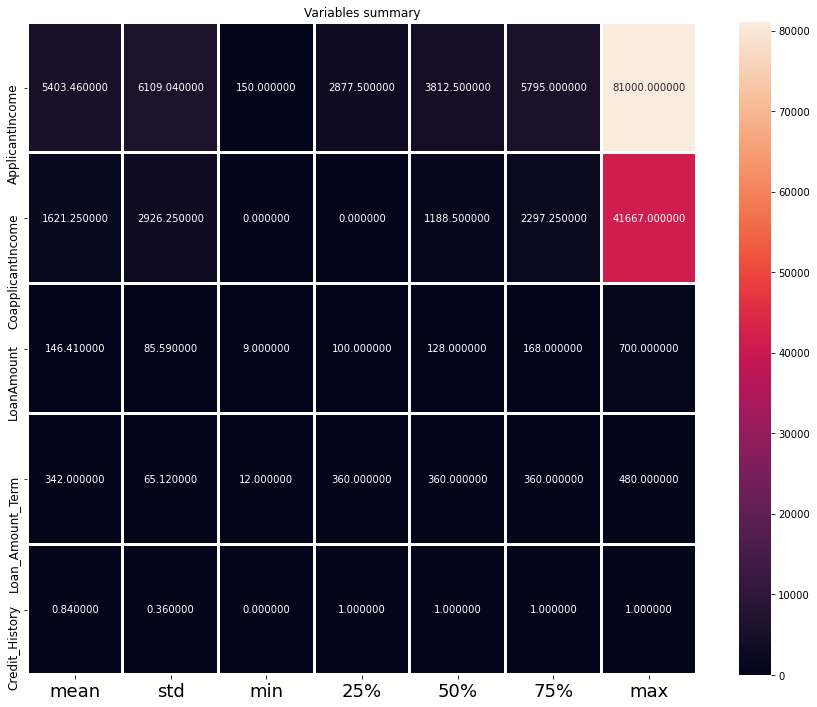

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of each column. It helps us further in data cleaning.

In [9]:
df['Loan_ID'].value_counts()

LP001036    1
LP002716    1
LP002151    1
LP002741    1
LP002239    1
           ..
LP002634    1
LP002776    1
LP001489    1
LP002467    1
LP001006    1
Name: Loan_ID, Length: 614, dtype: int64

In [10]:
# dropping Loan ID column as its just a identifier which does not add value for prediction
df=df.drop(['Loan_ID'],axis=1) 

In [11]:
df.isnull().sum()  # to check null values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### There are null values in the dataset

In [12]:
# treating null values of datatype 'object' with mode and 'float' with mean
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [13]:
df.isnull().sum() # now again checking for null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### No null values in the dataset

In [14]:
# to count sum of zeros (0's) present
print('Total no of zeros in LoanAmount are:',sum(df['LoanAmount']==0))
print('Total no of zeros in CoapplicantIncome are:',sum(df['CoapplicantIncome']==0))
print('Total no of zeros in ApplicantIncome are:',sum(df['ApplicantIncome']==0))
print('Total no of zeros in Loan_Amount_Term are:',sum(df['Loan_Amount_Term']==0))

Total no of zeros in LoanAmount are: 0
Total no of zeros in CoapplicantIncome are: 273
Total no of zeros in ApplicantIncome are: 0
Total no of zeros in Loan_Amount_Term are: 0


#### In Co Applicant Income column there are 273 values which are zero(0) which should not be the case if applicant is requesting for loan with the help of his co-applicant income.

In [15]:
# treating this 'CoapplicantIncome' error  
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].median())

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

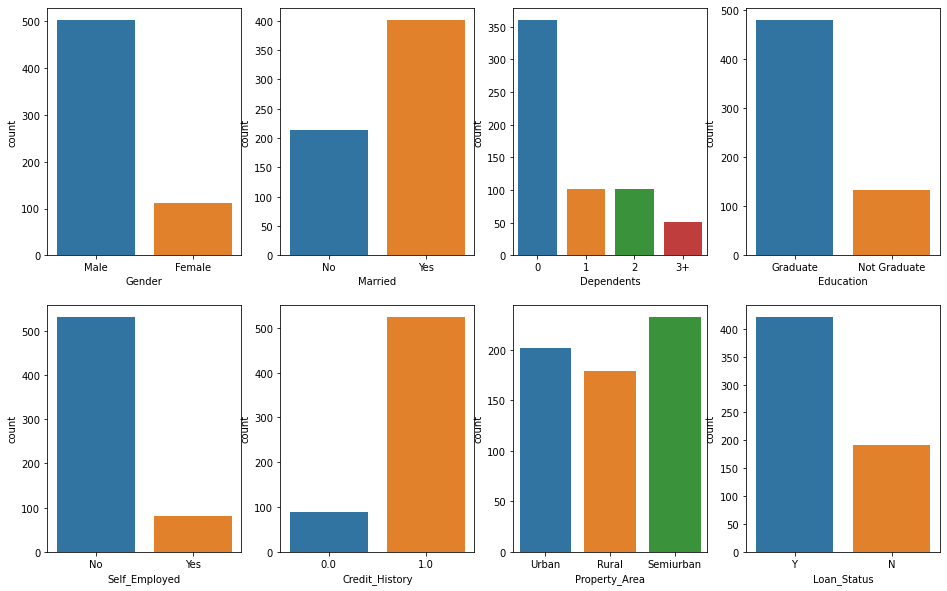

In [16]:
#Analysis
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Gender',data=df,ax=ax[0][0])
sns.countplot('Married',data=df,ax=ax[0][1])
sns.countplot('Dependents',data=df,ax=ax[0][2])
sns.countplot('Education',data=df,ax=ax[0][3])
sns.countplot('Self_Employed',data=df,ax=ax[1][0])
sns.countplot('Credit_History',data=df,ax=ax[1][1])
sns.countplot('Property_Area',data=df,ax=ax[1][2])
sns.countplot('Loan_Status',data=df,ax=ax[1][3])

#### Inferences from above plots

1. Number of male applicants applying for loan is more than female

2. Married applicants are approximately double in number to those Unmarried applicants applying for loan

3. Dependants with number zero(0) is maximum 

4. Count of graduate applicants is more than non-graduate applicants

5. Number of Self employed is less than that of Non-Self employed

6. Credit History of maximum applicants is present

7. Maximum Applicant properties are in Semi-urban area

8. Lots of applicants loan Status is approved

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

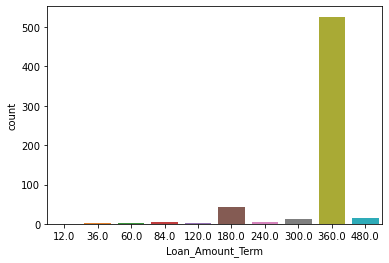

In [17]:
sns.countplot(x='Loan_Amount_Term',data=df)

#### Lots of applicants have applied for 360 months of loan

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

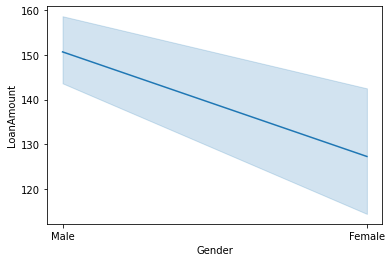

In [18]:
sns.lineplot(x='Gender',y='LoanAmount',data=df)

#### Male Applicants applying for loan amount is higher than females

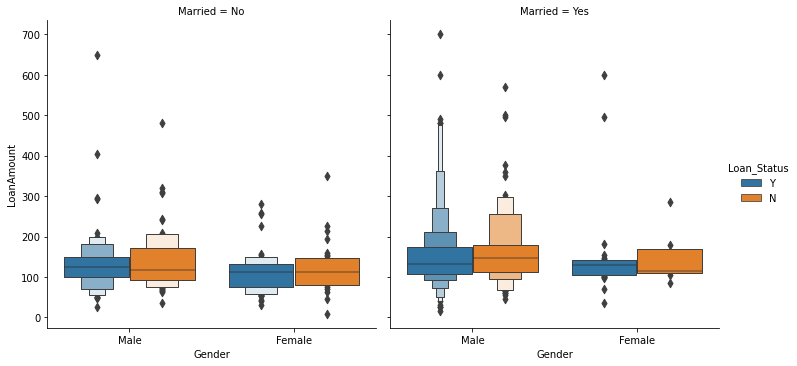

In [19]:
sns.catplot(x='Gender',y='LoanAmount',hue='Loan_Status',col='Married',data=df,kind='boxen')

#### Applicants those are married have requested for loan more than non-married

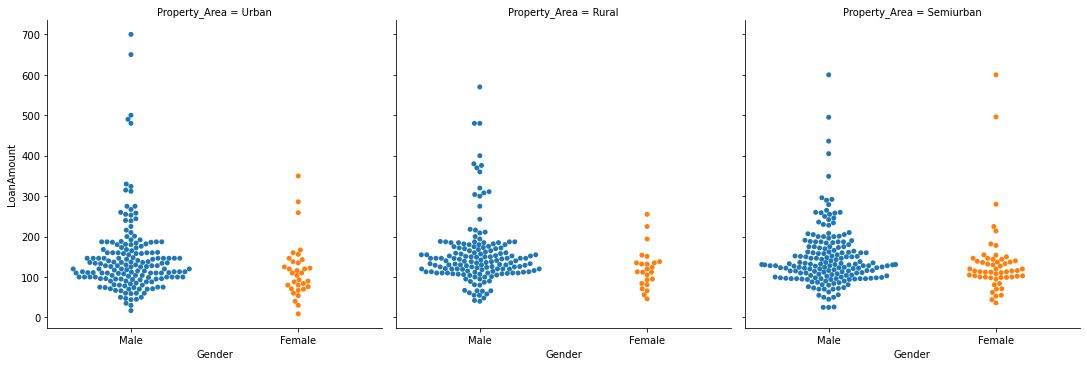

In [20]:
sns.catplot(x='Gender',y='LoanAmount',col='Property_Area',data=df,kind='swarm')

#### From semi urban area, maximum number of male and female applicants have requested for loan amount

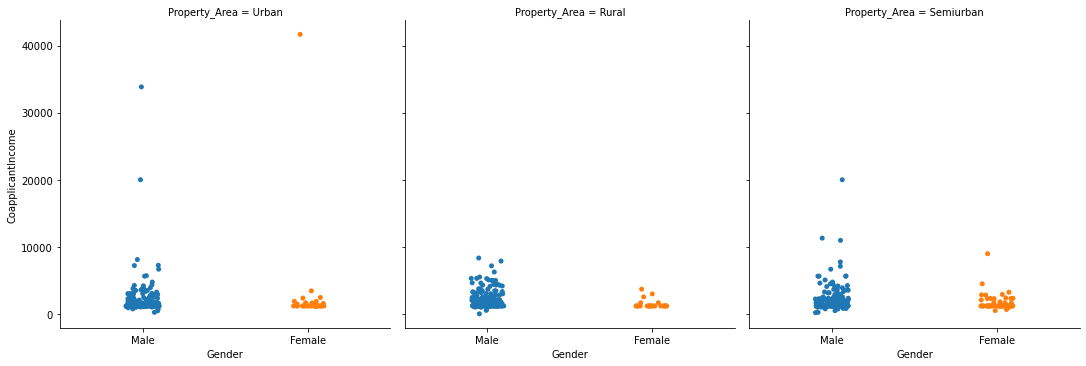

In [21]:
# Married vs [target(Loan Status)]
sns.catplot(x='Gender',y='CoapplicantIncome',col='Property_Area',data=df,kind='strip')

#### Male are having co-applicant whose income is more than female co-applicant in all three property areas

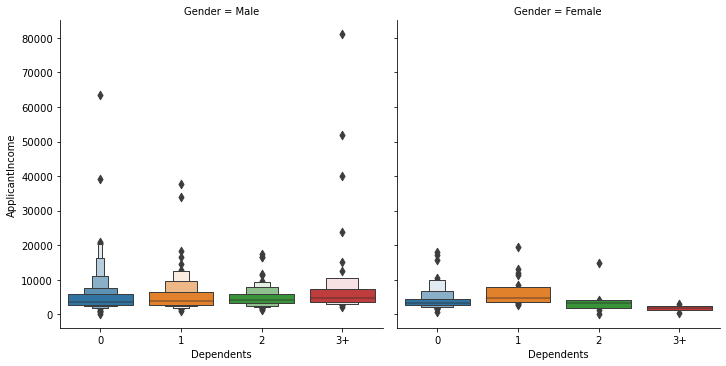

In [22]:
sns.catplot(x='Dependents',y='ApplicantIncome',col='Gender',data=df,kind='boxen')

#### Male have dependents much more than females 

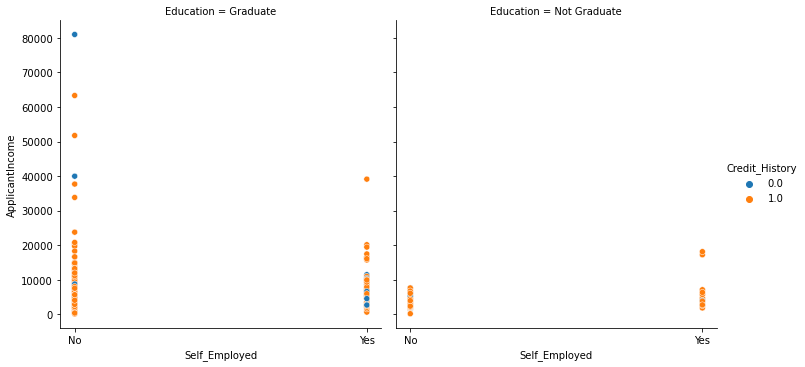

In [23]:
sns.relplot(x='Self_Employed',y='ApplicantIncome',hue='Credit_History',col='Education',data=df)

#### Applicants those who are not self employed but graduate has good credit history over self employed applicants but not graduate.

In [24]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['Property_Area','Gender','Married','Education','Loan_Status','Self_Employed','Dependents']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,1188.5,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,1188.5,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,1188.5,141.000000,360.0,1.0,2,1


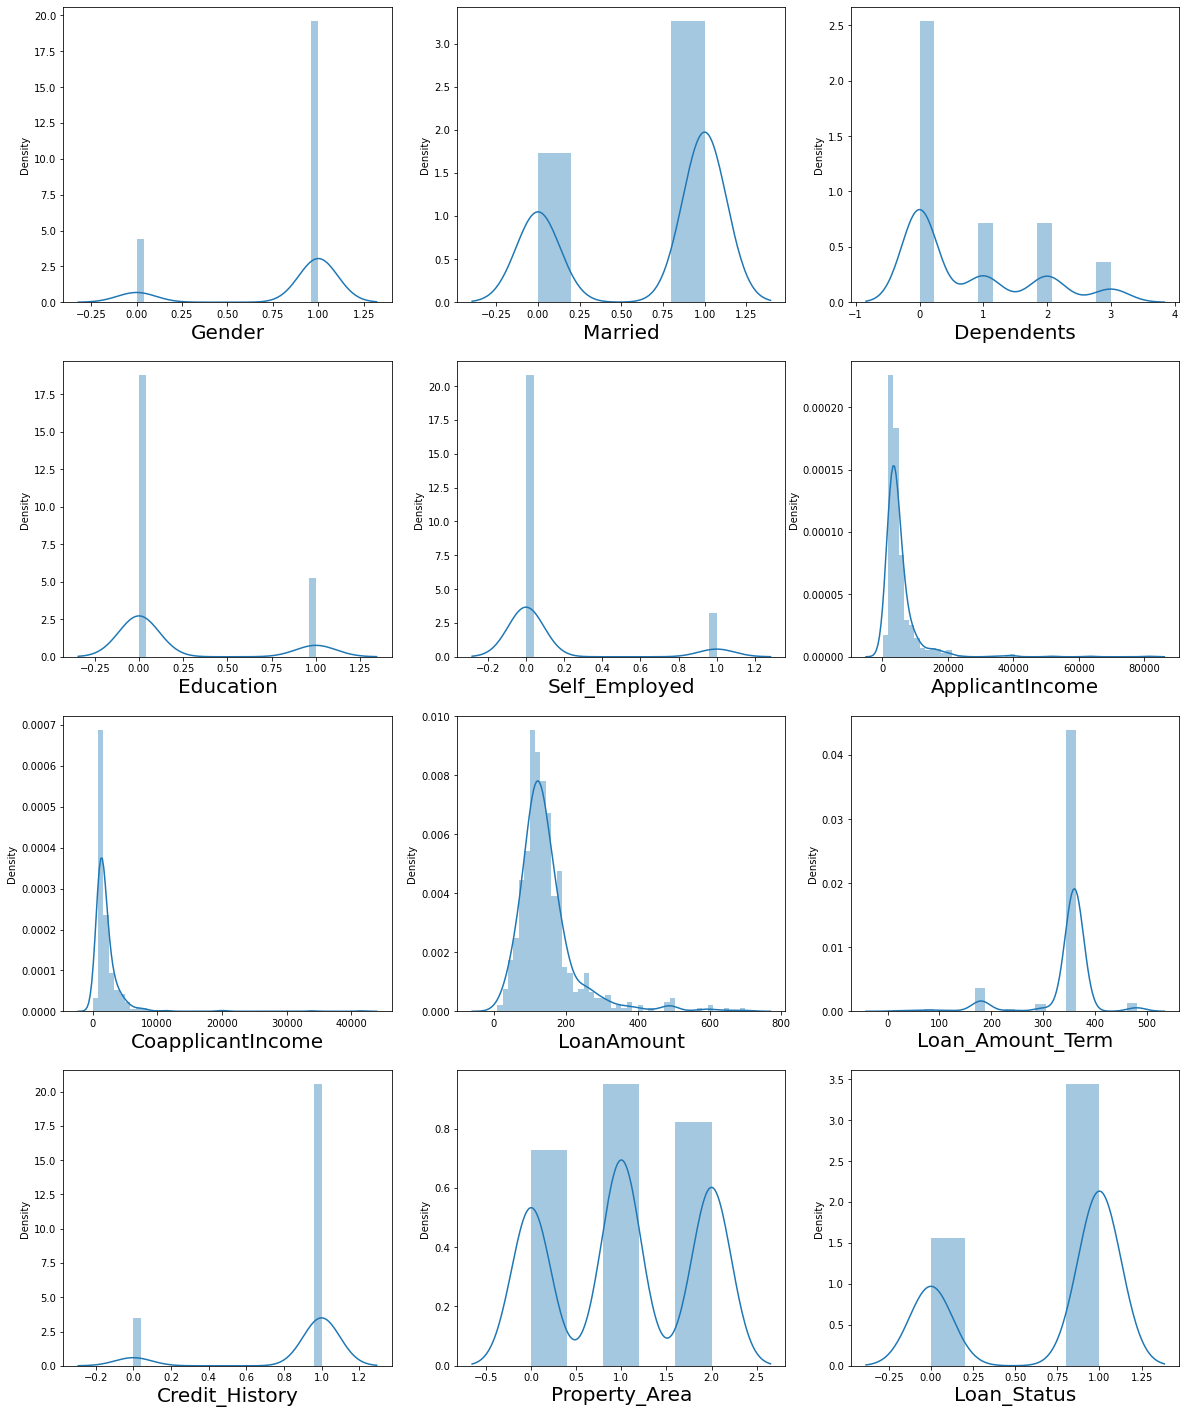

In [26]:
# lets visualize how data is distributed in every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Coapplicant Income,Loan Amount and Applicant income is having skewness.

In [27]:
from scipy.stats import skew
# to see skewness for every continous column stored in data_new
for col in df:
    print(col)
    print(skew(df[col]))

Gender
-1.644764550585881
Married
-0.6432737969221631
Dependents
1.0130683122414248
Education
1.3642786441579564
Self_Employed
2.1545162372084
ApplicantIncome
6.523526250899361
CoapplicantIncome
9.198029009507286
LoanAmount
2.719935540956202
Loan_Amount_Term
-2.396239917101247
Credit_History
-2.0170275689782207
Property_Area
-0.06603431807343829
Loan_Status
-0.8080179267715549


In [28]:
# removing the skewness
q = df['ApplicantIncome'].quantile(0.90)
# removing the top 10% data from the ApplicantIncome column
df= df[df['ApplicantIncome']<q]

q = df['CoapplicantIncome'].quantile(0.90)
# removing the top 10% data from the CoapplicantIncome column
df= df[df['CoapplicantIncome']<q]

q = df['LoanAmount'].quantile(0.95)
# removing the top 5% data from the LoanAmount column
df= df[df['LoanAmount']<q]

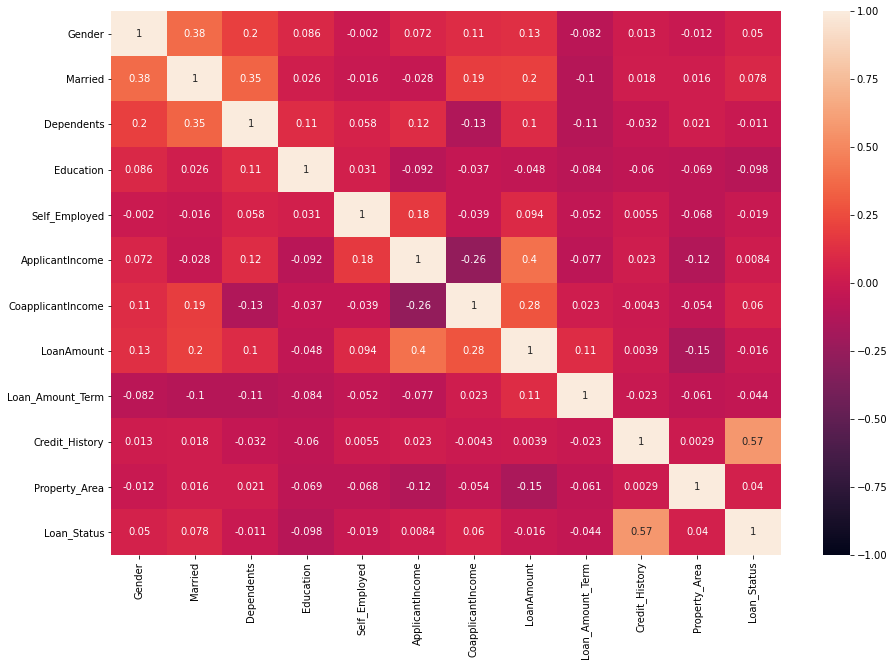

In [29]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Only credit history has good co-relation with loan status

In [30]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

In [31]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.199557,Gender
1,1.393261,Married
2,1.240681,Dependents
3,1.056981,Education
4,1.041183,Self_Employed
5,1.573206,ApplicantIncome
6,1.414223,CoapplicantIncome
7,1.597279,LoanAmount
8,1.077737,Loan_Amount_Term
9,1.006809,Credit_History


#### No Multicollinearity problem exists

In [34]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 101)

## Logistic Regression

In [35]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = log_reg.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8305084745762712

In [38]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[17, 17],
       [ 3, 81]], dtype=int64)

In [39]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.85      0.50      0.63        34
           1       0.83      0.96      0.89        84

    accuracy                           0.83       118
   macro avg       0.84      0.73      0.76       118
weighted avg       0.83      0.83      0.82       118



In [40]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(log_reg,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.83157895 0.78723404 0.79787234 0.87234043 0.84042553]
0.8258902575587908
0.03059594788900681


##  Decision Tree Classifier

In [41]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    108.0  245.0       1.0      353.0         353.0
______________________________________________
Confusion Matrix:
 [[108   0]
 [  0 245]]


===================Test Result======================
Accuracy Score: 77.12%
______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.612903   0.827586  0.771186    0.720245      0.765728
recall      0.558824   0.857143  0.771186    0.707983      0.771186
f1-score    0.584615   0.842105  0.771186    0.713360      0.767913
support    34.000000  84.000000  0.771186  118.

In [42]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.75789474 0.63829787 0.74468085 0.75531915 0.71276596]
0.7217917133258679
0.04473056141765952


## Random Forest Classifier

In [43]:
rand_clf = RandomForestClassifier(random_state=101)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    108.0  245.0       1.0      353.0         353.0
______________________________________________
Confusion Matrix:
 [[108   0]
 [  0 245]]


===================Test Result======================
Accuracy Score: 83.05%
______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.818182   0.833333  0.830508    0.825758      0.828968
recall      0.529412   0.952381  0.830508    0.740896      0.830508
f1-score    0.642857   0.888889  0.830508    0.765873      0.817998
support    34.000000  84.000000  0.830508  118.

In [44]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X_scaled,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.82105263 0.76595745 0.81914894 0.82978723 0.81914894]
0.8110190369540874
0.022872060125944785


## KNN Classifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 84.42%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.853333    0.841727  0.844193    0.847530      0.845278
recall       0.592593    0.955102  0.844193    0.773847      0.844193
f1-score     0.699454    0.894837  0.844193    0.797146      0.835060
support    108.000000  245.000000  0.844193  353.000000    353.000000
______________________________________________
Confusion Matrix:
 [[ 64  44]
 [ 11 234]]


===================Test Result======================
Accuracy Score: 80.51%
______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.720000   0.827957  0.805085    0.773978      0.796851
recall      0.529412   0.916667  0.805085    0.723039      0.805085
f1-score    0.610169   0.870056  0.805085    0.740113      0.

In [46]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.77070064 0.78980892 0.75159236]
0.7707006369426752
0.015601845495434252


## Support-Vector Machines

In [51]:
svc = SVC(kernel = 'rbf',C=5)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 90.08%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.875000   0.90085    0.937500      0.913244
recall       0.675926    1.000000   0.90085    0.837963      0.900850
f1-score     0.806630    0.933333   0.90085    0.869982      0.894569
support    108.000000  245.000000   0.90085  353.000000    353.000000
______________________________________________
Confusion Matrix:
 [[ 73  35]
 [  0 245]]


===================Test Result======================
Accuracy Score: 81.36%
______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.730769   0.836957  0.813559    0.783863      0.806360
recall      0.558824   0.916667  0.813559    0.737745      0.813559
f1-score    0.633333   0.875000  0.813559    0.754167      0.

In [52]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X_scaled,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.80254777 0.8089172  0.77707006]
0.7961783439490446
0.013759534391524116


## Gradient Boosting Classifier

In [53]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 93.77%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.917603  0.937677    0.958801      0.942812
recall       0.796296    1.000000  0.937677    0.898148      0.937677
f1-score     0.886598    0.957031  0.937677    0.921815      0.935482
support    108.000000  245.000000  0.937677  353.000000    353.000000
______________________________________________
Confusion Matrix:
 [[ 86  22]
 [  0 245]]


===================Test Result======================
Accuracy Score: 81.36%
______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.750000   0.829787  0.813559    0.789894      0.806798
recall      0.529412   0.928571  0.813559    0.728992      0.813559
f1-score    0.620690   0.876404  0.813559    0.748547      0.

In [54]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X_scaled,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.79617834 0.81528662 0.78980892]
0.8004246284501062
0.010825943765589773


## Stochastic Gradient Descent

In [55]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7203389830508474

In [56]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X_scaled,y,cv=3)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.70063694 0.76433121 0.71974522]
0.7282377919320595
0.026687484267466147


## PCA

In [57]:
scaler = StandardScaler()
X=df.drop('Loan_Status', axis=1)
X_scaled = scaler.fit_transform(X)

In [58]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.42455779,  1.33079057,  0.0751303 , ..., -1.05701138,
         0.53697117, -0.2135162 ],
       [-0.99902179,  0.4654896 , -0.35465857, ..., -0.08346758,
        -0.24393517,  0.06497071],
       [ 0.39762357, -0.14779262,  1.01032599, ..., -1.44900874,
        -0.93288318,  0.13093644],
       ...,
       [-0.96807946, -1.0262045 ,  2.6320582 , ...,  0.84801692,
         0.77350762,  0.74764042],
       [-2.28037936,  1.4639682 ,  0.54655911, ...,  0.2616735 ,
        -0.00914288,  0.16062299],
       [ 1.36254546,  2.65947508,  0.34618227, ...,  0.27078167,
        -0.37451335, -0.3729099 ]])

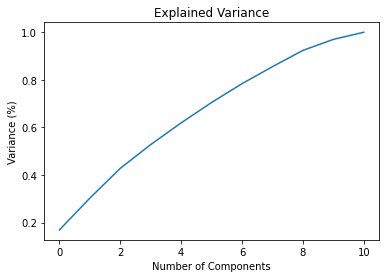

In [59]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

#### we can see that 95% of the variance is being explained by 8 components

In [60]:
pca=PCA(n_components=8)
new_data=pca.fit_transform(X_scaled)

principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [61]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,0.424558,1.330791,0.075130,-1.355163,0.434296,0.047785,0.370484,-1.362254
1,-0.999022,0.465490,-0.354659,-0.210007,0.002343,-1.028558,0.403216,1.008561
2,0.397624,-0.147793,1.010326,-0.738280,-0.942929,1.429088,-2.514284,0.913044
3,-0.185704,-1.776460,-0.592107,0.352286,-0.562696,-0.006980,-0.515855,-1.686724
4,0.462205,1.339340,0.147981,-1.368011,0.430557,0.037454,0.386003,-1.327746
...,...,...,...,...,...,...,...,...
466,-0.198011,-0.308724,-1.087395,0.003091,-0.526271,-0.707815,0.389665,1.196989
467,2.680778,0.824581,-0.041637,0.318282,-0.471747,-0.768340,0.320769,1.199608
468,-0.968079,-1.026205,2.632058,-0.411687,-0.866168,-0.457088,1.345407,2.462688
469,-2.280379,1.463968,0.546559,-1.836240,1.268277,-0.249261,0.077428,-1.300582


## Lets plot ROC AUC Curve to choose the best model

In [62]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [63]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [64]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


## Lets find ROC AUC score

In [65]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7675070028011205

In [66]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

1.0

In [67]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

1.0

In [68]:
# KneighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7528011204481793

In [69]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

1.0

In [70]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.7492997198879552

## Lets check ROC AUC curve for the fitted model

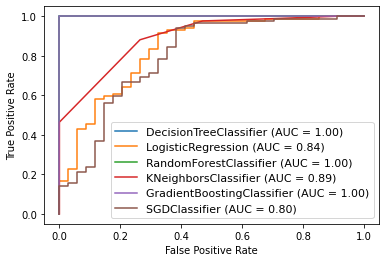

In [71]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

#### Gradient Boosting Classifier model is our best model because accuracy and CV score is giving least difference value than other models.

### Using GridSearchCV for hyper parameter tuning on best model (Gradient Boosting Classifier)

In [72]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [73]:
grid_search = GridSearchCV(estimator=gbdt_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [75]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 2, 'min_samples_leaf': 13, 'min_samples_split': 10}


In [77]:
gbdt_clf = GradientBoostingClassifier(max_depth =2, min_samples_leaf=13, min_samples_split=10)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=2, min_samples_leaf=13,
                           min_samples_split=10)

In [78]:
gbdt_clf.score(x_test,y_test)

0.8220338983050848

In [79]:
# After applying hyper parameter tuning accuracy has increased by 0.84%.

## Model Saving

In [80]:
# saving the model to local system
filename = 'Loan Application Status.pickle'
pickle.dump(gbdt_clf,open(filename,'wb'))

In [81]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

## Loading and predicting with the loaded model

In [82]:
# loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [83]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)